In [1]:
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd
pd.options.display.max_rows=2000
pd.set_option('display.max.colwidth', -1)
import numpy as numpy
import re
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import platform

# 글꼴
if platform.system() == 'Windows':  # 윈도우인 경우, 맑은 고딕
    plt.rc('font', family='Malgun Gothic')

elif platform.system() == 'Darwin':  # Mac 인 경우, AppleGothic(기본 글꼴)
    plt.rc('font', family='AppleGothic')
else:  # 리눅스
    plt.rc('font', family='NanumBarunGothic')

# matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

In [25]:
df1 = pd.read_csv('rfm-2020-08-31-2020-11-22.csv')
df2 = pd.read_csv('rfm-2020-09-07-2020-11-29.csv')
df3 = pd.read_csv('rfm-2020-09-14-2020-12-06.csv')
df4 = pd.read_csv('rfm-2020-09-21-2020-12-13.csv')
df5 = pd.read_csv('rfm-2020-09-28-2020-12-20.csv')
df6 = pd.read_csv('rfm-2020-10-05-2020-12-27.csv')
df7 = pd.read_csv('rfm-2020-10-12-2021-01-03.csv')
df8 = pd.read_csv('rfm-2020-10-19-2021-01-10.csv')
df9 = pd.read_csv('rfm-2020-10-26-2021-01-17.csv')
df10 = pd.read_csv('rfm-2020-11-02-2021-01-24.csv')
df11 = pd.read_csv('rfm-2020-11-09-2021-01-31.csv')
df12 = pd.read_csv('rfm-2020-11-16-2021-02-07.csv')
df13 = pd.read_csv('rfm-2020-11-23-2021-02-14.csv')
df14 = pd.read_csv('rfm-2020-11-30-2021-02-21.csv')
df15 = pd.read_csv('rfm-2020-12-07-2021-02-28.csv')
df16 = pd.read_csv('rfm-2020-12-14-2021-03-07.csv')
df17 = pd.read_csv('rfm-2020-12-21-2021-03-14.csv')
df18 = pd.read_csv('rfm-2020-12-28-2021-03-21.csv')
df19 = pd.read_csv('rfm-2021-01-04-2021-03-28.csv')
df20 = pd.read_csv('rfm-2021-01-11-2021-04-04.csv')
df21 = pd.read_csv('rfm-2021-01-18-2021-04-11.csv')
df22 = pd.read_csv('rfm-2021-01-25-2021-04-18.csv')
df23 = pd.read_csv('rfm-2021-02-01-2021-04-25.csv')
df24 = pd.read_csv('rfm-2021-02-08-2021-05-02.csv')
df25 = pd.read_csv('rfm-2021-02-15-2021-05-09.csv')
df26 = pd.read_csv('rfm-2021-02-22-2021-05-16.csv')
df27 = pd.read_csv('rfm-2021-03-01-2021-05-23.csv')
df28 = pd.read_csv('rfm-2021-03-08-2021-05-30.csv')

In [12]:
total = 0
for i in range(1, 29):
    print('df',i,': ', globals()['df{}'.format(i)].shape)
    total += globals()['df{}'.format(i)].shape[0]
    
print('총합: {}'.format(total))

df 1 :  (844361, 10)
df 2 :  (845430, 10)
df 3 :  (851056, 10)
df 4 :  (860786, 10)
df 5 :  (881288, 10)
df 6 :  (901983, 10)
df 7 :  (896261, 10)
df 8 :  (890088, 10)
df 9 :  (891213, 10)
df 10 :  (880155, 10)
df 11 :  (867186, 10)
df 12 :  (858168, 10)
df 13 :  (844165, 10)
df 14 :  (848624, 10)
df 15 :  (849604, 10)
df 16 :  (853878, 10)
df 17 :  (854748, 10)
df 18 :  (869501, 10)
df 19 :  (893958, 10)
df 20 :  (912994, 10)
df 21 :  (930107, 10)
df 22 :  (948850, 10)
df 23 :  (973622, 10)
df 24 :  (992147, 10)
df 25 :  (1010296, 10)
df 26 :  (1020795, 10)
df 27 :  (1023927, 10)
df 28 :  (1023364, 10)
총합: 25318555


- 데이터프레임별 주별 일자 생성

In [10]:
len(df1.columns)

10

In [15]:
df1.head()

,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,22.0,32.0,225810.0,1253992500,0.975904,1.000000,1.000000,0.991968,5등급,2020-11-22
1,1,2.0,5.0,127300.0,133000,0.759036,0.090909,0.563748,0.471231,3등급,2020-11-22
2,35,15.0,32.0,225810.0,1146590,0.975904,0.681818,1.000000,0.885907,5등급,2020-11-22
3,80,4.0,4.0,91100.0,121800,0.951807,0.181818,0.403437,0.512354,3등급,2020-11-22
4,88,16.0,20.0,225810.0,1384600,0.867470,0.727273,1.000000,0.864914,5등급,2020-11-22


In [14]:
df1.insert(10, 'WEEK', '2020-11-22')

In [18]:
week_list = ['2020-11-22', '2020-11-29','2020-12-06', '2020-12-13', '2020-12-20', '2020-12-27', '2021-01-03', '2021-01-10', '2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30' ]

In [19]:
len(week_list)

28

In [26]:
df_list = []
for c, i in enumerate(week_list):
    globals()['df{}'.format(c+1)].insert(10, 'WEEK', i)
    print('df',c+1,': ')
    display(globals()['df{}'.format(c+1)].head(1))
    df_list.append('df{}'.format(c+1))

df 1 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,22.0,32.0,225810.0,1253992500,0.975904,1.0,1.0,0.991968,5등급,2020-11-22


df 2 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,22.0,32.0,235910.0,1255646404,0.891566,1.0,1.0,0.963855,5등급,2020-11-29


df 3 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,21.0,32.0,241830.0,1269960612,0.807229,1.0,1.0,0.935743,5등급,2020-12-06


df 4 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,21.0,31.0,245300.0,1267123437,0.722892,1.0,1.0,0.907631,5등급,2020-12-13


df 5 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,20.0,31.0,247860.0,1267114097,0.638554,1.0,1.0,0.879518,5등급,2020-12-20


df 6 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,20.0,30.0,249100.0,1290781581,0.554217,1.0,1.0,0.851406,5등급,2020-12-27


df 7 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,18.0,28.0,246130.0,1266601702,0.46988,1.0,1.0,0.823293,5등급,2021-01-03


df 8 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,17.0,28.0,247920.0,1243953876,0.385542,1.0,1.0,0.795181,4등급,2021-01-10


df 9 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,17.0,27.0,248578.0,1222879310,0.301205,1.0,1.0,0.767068,4등급,2021-01-17


df 10 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,17.0,27.0,247440.0,1180561038,0.216867,1.0,1.0,0.738956,4등급,2021-01-24


df 11 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,16.0,26.0,242450.0,1134679588,0.13253,1.0,1.0,0.710843,4등급,2021-01-31


df 12 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,16.0,26.0,238620.0,1132027888,0.048193,1.0,1.0,0.682731,4등급,2021-02-07


df 13 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,16.0,26.0,235130.0,1105562169,0.048193,1.0,1.0,0.682731,4등급,2021-02-14


df 14 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,25.0,228340.0,1123309706,0.0,1.0,1.0,0.666667,4등급,2021-02-21


df 15 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,24.0,221290.0,1117403164,0.156627,1.0,1.0,0.718876,4등급,2021-02-28


df 16 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,14.0,24.0,220100.0,1108480444,0.072289,1.0,1.0,0.690763,4등급,2021-03-07


df 17 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,14.0,24.0,220100.0,1109539948,0.072289,1.0,1.0,0.690763,4등급,2021-03-14


df 18 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,24.0,222420.0,1134050827,0.012048,1.0,1.0,0.670683,4등급,2021-03-21


df 19 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,24.0,225000.0,1161288375,0.903614,1.0,1.0,0.967871,5등급,2021-03-28


df 20 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,24.0,224717.0,1204186031,0.819277,1.0,1.0,0.939759,5등급,2021-04-04


df 21 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,25.0,224640.0,1230088379,0.73494,1.0,1.0,0.911647,5등급,2021-04-11


df 22 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,25.0,227000.0,1259950096,0.650602,1.0,1.0,0.883534,5등급,2021-04-18


df 23 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,25.0,234540.0,1298968196,0.566265,1.0,1.0,0.855422,5등급,2021-04-25


df 24 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,26.0,235244.0,1343106090,0.481928,1.0,1.0,0.827309,5등급,2021-05-02


df 25 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,26.0,235890.0,1386999968,0.39759,1.0,1.0,0.799197,4등급,2021-05-09


df 26 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,26.0,237000.0,1408789600,0.313253,1.0,1.0,0.771084,4등급,2021-05-16


df 27 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,26.0,235600.0,1405077979,0.228916,1.0,1.0,0.742972,4등급,2021-05-23


df 28 : 


,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,15.0,26.0,231900.0,1435641967,0.144578,1.0,1.0,0.714859,4등급,2021-05-30


In [28]:
df_list = ','.join(df_list).replace("''","")
print('df_list: ', df_list)

df_list:  df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28


In [29]:
pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28]).shape

(25318555, 11)

In [32]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,df22,df23,df24,df25,df26,df27,df28])

In [33]:
df.shape

(25318555, 11)

In [34]:
df.to_csv('RFM-2020-11-22_2021-05-30(전체).csv', index=False)

# 회원 파악

In [3]:
df = pd.read_csv('RFM-2020-11-22_2021-05-30(전체).csv')

In [4]:
df.shape

(25318555, 11)

In [5]:
df.columns

Index(['ORDRR_MBER_NO', 'ORDER_CNT', 'ORDER_DETAIL_CNT',
       'ORDER_DETAIL_DSCNT_PC_SUM', 'ORDER_DETAIL_SELL_PC_SUM', 'RECENCY',
       'FREQUENCY', 'MONETARY', 'RFM', 'GRADE', 'WEEK'],
      dtype='object')

In [7]:
len(df['ORDRR_MBER_NO'].unique())

1787713

In [4]:
mem_list = df['ORDRR_MBER_NO'].unique().tolist()

In [5]:
mem_list

[0,
 1,
 35,
 80,
 88,
 226,
 265,
 283,
 352,
 368,
 445,
 467,
 547,
 594,
 597,
 663,
 674,
 713,
 748,
 752,
 761,
 798,
 831,
 889,
 934,
 1023,
 1045,
 1074,
 1079,
 1094,
 1099,
 1105,
 1120,
 1130,
 1155,
 1171,
 1181,
 1204,
 1222,
 1254,
 1327,
 1446,
 1485,
 1517,
 1548,
 1575,
 1627,
 1658,
 1691,
 1706,
 1725,
 1732,
 1807,
 1808,
 1811,
 1909,
 1914,
 1916,
 1967,
 2030,
 2061,
 2074,
 2119,
 2167,
 2171,
 2175,
 2251,
 2257,
 2263,
 2269,
 2300,
 2311,
 2319,
 2342,
 2360,
 2372,
 2433,
 2515,
 2839,
 2899,
 3223,
 3318,
 3324,
 3342,
 3418,
 3519,
 3571,
 3596,
 3600,
 3623,
 3672,
 3682,
 3848,
 3885,
 3914,
 4084,
 4138,
 4209,
 4546,
 4648,
 4677,
 4695,
 4697,
 4706,
 4728,
 4744,
 4791,
 4838,
 4862,
 4863,
 4931,
 4943,
 4970,
 4987,
 5004,
 5021,
 5022,
 5028,
 5035,
 5050,
 5055,
 5155,
 5167,
 5183,
 5215,
 5235,
 5236,
 5277,
 5287,
 5293,
 5305,
 5413,
 5425,
 5452,
 5458,
 5475,
 5557,
 5575,
 5576,
 5597,
 5623,
 5632,
 5633,
 5665,
 5668,
 5669,
 5686,
 56

# 회원수별 RFM 파악 - 데이터 생성 및 시각화

In [7]:
len(df.loc[df['ORDRR_MBER_NO'] == 0])

28

In [10]:
pd.pivot_table(df, values='RFM',columns='WEEK',index='ORDRR_MBER_NO').reset_index()

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,0.991968,0.963855,0.935743,0.907631,0.879518,0.851406,0.823293,0.795181,0.767068,...,0.967871,0.939759,0.911647,0.883534,0.855422,0.827309,0.799197,0.771084,0.742972,0.714859
1,1,0.471231,0.435073,0.404001,0.373406,0.557229,0.562450,0.547300,0.526813,0.479093,...,0.610755,0.582913,0.554874,0.524528,0.661580,0.579509,0.583133,0.532798,0.504685,0.476573
2,35,0.885907,0.827492,0.856378,0.828265,0.796185,0.784739,0.786256,0.795181,0.767068,...,0.796519,0.746185,0.718072,0.689960,0.684070,0.611513,0.561178,0.533066,0.504953,0.515127
3,80,0.512354,0.478484,0.673743,0.661503,0.638153,0.626707,0.611557,0.591070,0.562958,...,0.400400,0.771252,0.743245,0.711945,0.623575,0.685676,0.657564,0.629451,0.601339,0.617671
4,88,0.864914,0.882256,0.851979,0.823867,0.810040,0.781928,0.787149,0.759036,0.730924,...,0.870950,0.887282,0.814726,0.764391,0.758501,0.730388,0.724498,0.740830,0.712718,0.662383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787708,5858118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395659
1787709,5858119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379560
1787710,5858132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.413052
1787711,5858133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381429


In [11]:
df_RFM = pd.pivot_table(df, values='RFM',columns='WEEK',index='ORDRR_MBER_NO').reset_index()

In [15]:
df_RFM.head(10)

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,0.991968,0.963855,0.935743,0.907631,0.879518,0.851406,0.823293,0.795181,0.767068,...,0.967871,0.939759,0.911647,0.883534,0.855422,0.827309,0.799197,0.771084,0.742972,0.714859
1,1,0.471231,0.435073,0.404001,0.373406,0.557229,0.562450,0.547300,0.526813,0.479093,...,0.610755,0.582913,0.554874,0.524528,0.661580,0.579509,0.583133,0.532798,0.504685,0.476573
2,35,0.885907,0.827492,0.856378,0.828265,0.796185,0.784739,0.786256,0.795181,0.767068,...,0.796519,0.746185,0.718072,0.689960,0.684070,0.611513,0.561178,0.533066,0.504953,0.515127
3,80,0.512354,0.478484,0.673743,0.661503,0.638153,0.626707,0.611557,0.591070,0.562958,...,0.400400,0.771252,0.743245,0.711945,0.623575,0.685676,0.657564,0.629451,0.601339,0.617671
4,88,0.864914,0.882256,0.851979,0.823867,0.810040,0.781928,0.787149,0.759036,0.730924,...,0.870950,0.887282,0.814726,0.764391,0.758501,0.730388,0.724498,0.740830,0.712718,0.662383
5,124,NaN,NaN,NaN,NaN,NaN,0.500005,0.475603,0.447454,0.418932,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,226,0.445298,0.409274,0.537087,0.504991,0.480361,0.349703,0.335182,0.322988,0.401217,...,0.774029,0.768139,0.740027,0.689692,0.639357,0.611245,0.544533,0.290379,0.262939,0.236642
7,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.413493,0.385397,0.356788,0.327156,0.298906,0.270669,0.242343,0.214500,0.187114
8,235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.519330,0.485694,0.457084,0.428517,0.399631,0.372496,0.347025
9,262,NaN,NaN,NaN,NaN,0.430441,0.401995,0.380244,0.632627,0.603653,...,0.326703,0.375421,0.434319,0.405515,0.375289,0.346986,0.481010,0.452049,0.425008,0.399789


In [16]:
df_RFM.fillna(0, inplace=True)

In [17]:
df_RFM.head(10)

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,0.991968,0.963855,0.935743,0.907631,0.879518,0.851406,0.823293,0.795181,0.767068,...,0.967871,0.939759,0.911647,0.883534,0.855422,0.827309,0.799197,0.771084,0.742972,0.714859
1,1,0.471231,0.435073,0.404001,0.373406,0.557229,0.562450,0.547300,0.526813,0.479093,...,0.610755,0.582913,0.554874,0.524528,0.661580,0.579509,0.583133,0.532798,0.504685,0.476573
2,35,0.885907,0.827492,0.856378,0.828265,0.796185,0.784739,0.786256,0.795181,0.767068,...,0.796519,0.746185,0.718072,0.689960,0.684070,0.611513,0.561178,0.533066,0.504953,0.515127
3,80,0.512354,0.478484,0.673743,0.661503,0.638153,0.626707,0.611557,0.591070,0.562958,...,0.400400,0.771252,0.743245,0.711945,0.623575,0.685676,0.657564,0.629451,0.601339,0.617671
4,88,0.864914,0.882256,0.851979,0.823867,0.810040,0.781928,0.787149,0.759036,0.730924,...,0.870950,0.887282,0.814726,0.764391,0.758501,0.730388,0.724498,0.740830,0.712718,0.662383
5,124,0.000000,0.000000,0.000000,0.000000,0.000000,0.500005,0.475603,0.447454,0.418932,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,226,0.445298,0.409274,0.537087,0.504991,0.480361,0.349703,0.335182,0.322988,0.401217,...,0.774029,0.768139,0.740027,0.689692,0.639357,0.611245,0.544533,0.290379,0.262939,0.236642
7,229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.413493,0.385397,0.356788,0.327156,0.298906,0.270669,0.242343,0.214500,0.187114
8,235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.519330,0.485694,0.457084,0.428517,0.399631,0.372496,0.347025
9,262,0.000000,0.000000,0.000000,0.000000,0.430441,0.401995,0.380244,0.632627,0.603653,...,0.326703,0.375421,0.434319,0.405515,0.375289,0.346986,0.481010,0.452049,0.425008,0.399789


In [23]:
df_RFM.to_csv('RFM-2020-11-22_2021-05-30_RFM.csv', index=False)

- 행열 바꾼 것 필요 -> 이걸 주력해서 사용해야 함

In [33]:
df_RFM_t = pd.pivot_table(df, values='RFM',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

In [36]:
df_RFM_t.fillna(0, inplace=True)

In [37]:
df_RFM_t.head()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,0.991968,0.471231,0.885907,0.512354,0.864914,0.0,0.445298,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-11-29,0.963855,0.435073,0.827492,0.478484,0.882256,0.0,0.409274,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-06,0.935743,0.404001,0.856378,0.673743,0.851979,0.0,0.537087,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-13,0.907631,0.373406,0.828265,0.661503,0.823867,0.0,0.504991,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-20,0.879518,0.557229,0.796185,0.638153,0.810040,0.0,0.480361,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df_RFM_t.to_csv('RFM-2020-11-22_2021-05-30_RFM_t.csv', index=False)

In [45]:
sam_mem_list = mem_list[:10]

In [47]:
len(sam_mem_list)

10

In [49]:
sam_mem_list

[0, 1, 35, 80, 88, 226, 265, 283, 352, 368]

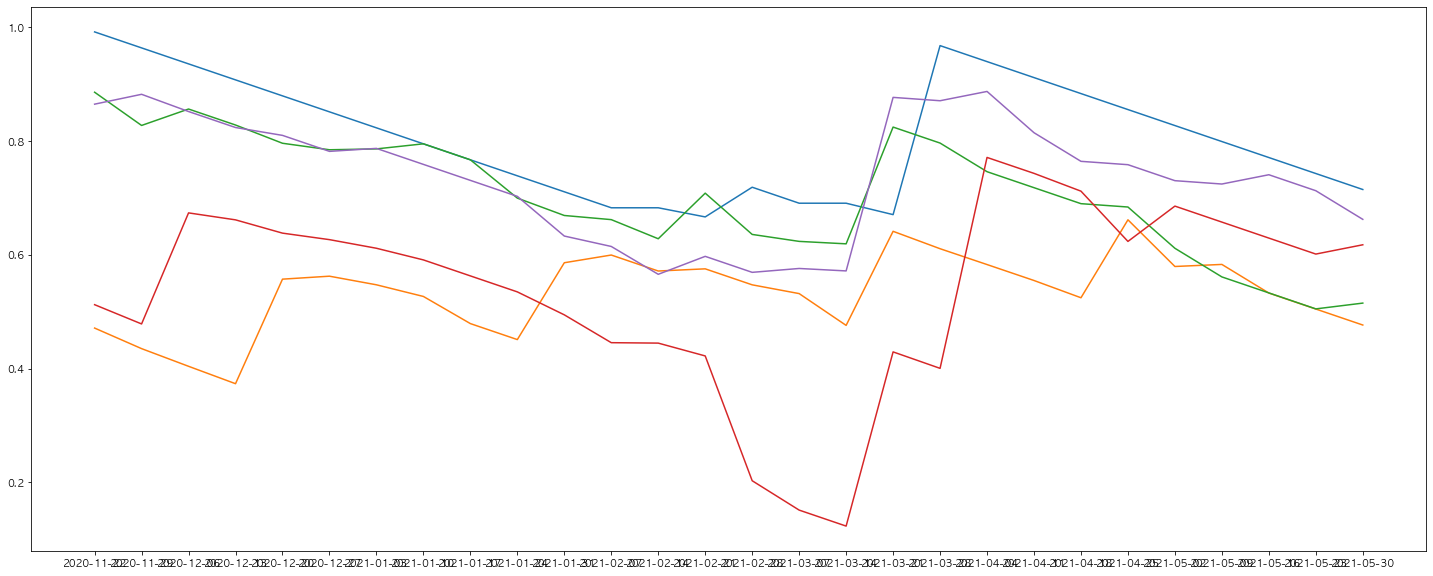

In [54]:
plt.figure(figsize=(25,10))

plt.plot(df_RFM_t['WEEK'], df_RFM_t[0])
plt.plot(df_RFM_t['WEEK'], df_RFM_t[1])
plt.plot(df_RFM_t['WEEK'], df_RFM_t[35])
plt.plot(df_RFM_t['WEEK'], df_RFM_t[80])
plt.plot(df_RFM_t['WEEK'], df_RFM_t[88])
# plt.plot(df_RFM_t['WEEK'], df_RFM_t[226])
# plt.plot(df_RFM_t['WEEK'], df_RFM_t[265])
# plt.plot(df_RFM_t['WEEK'], df_RFM_t[283])
# plt.plot(df_RFM_t['WEEK'], df_RFM_t[352])
# plt.plot(df_RFM_t['WEEK'], df_RFM_t[368])

In [55]:
plt.figure(figsize=(25,10))
for i in mem_list:
    plt.plot(df_RFM_t['WEEK'], df_RFM_t[i])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fae0ee66430> (for post_execute):


KeyboardInterrupt: 

- 시간이 너무 많이 걸림. 일정 기준을 설정해서(랜덤 or 사분위) 추출한 일부 회원번호를 특정해서 파악하는 것이 필요

# 회원수별 R 파악 - 데이터 생성

In [57]:
df.head()

,ORDRR_MBER_NO,ORDER_CNT,ORDER_DETAIL_CNT,ORDER_DETAIL_DSCNT_PC_SUM,ORDER_DETAIL_SELL_PC_SUM,RECENCY,FREQUENCY,MONETARY,RFM,GRADE,WEEK
0,0,22.0,32.0,225810.0,1253992500,0.975904,1.000000,1.000000,0.991968,5등급,2020-11-22
1,1,2.0,5.0,127300.0,133000,0.759036,0.090909,0.563748,0.471231,3등급,2020-11-22
2,35,15.0,32.0,225810.0,1146590,0.975904,0.681818,1.000000,0.885907,5등급,2020-11-22
3,80,4.0,4.0,91100.0,121800,0.951807,0.181818,0.403437,0.512354,3등급,2020-11-22
4,88,16.0,20.0,225810.0,1384600,0.867470,0.727273,1.000000,0.864914,5등급,2020-11-22


In [58]:
pd.pivot_table(df, values='RECENCY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,0.975904,0.759036,0.975904,0.951807,0.867470,NaN,0.554217,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-29,0.891566,0.674699,0.891566,0.867470,0.783133,NaN,0.469880,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-06,0.807229,0.590361,0.807229,0.783133,0.698795,NaN,0.385542,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-13,0.722892,0.506024,0.722892,0.698795,0.614458,NaN,0.301205,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-20,0.638554,0.421687,0.638554,0.614458,0.530120,NaN,0.216867,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-27,0.554217,0.337349,0.554217,0.530120,0.445783,0.987952,0.132530,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-03,0.469880,0.253012,0.469880,0.445783,0.361446,0.903614,0.048193,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-10,0.385542,0.168675,0.385542,0.361446,0.277108,0.819277,0.048193,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-17,0.301205,0.084337,0.301205,0.277108,0.192771,0.734940,0.445783,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-24,0.216867,0.000000,0.216867,0.192771,0.108434,0.650602,0.361446,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
df_R_t = pd.pivot_table(df, values='RECENCY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

In [66]:
df_R_t.fillna(0, inplace=True)

In [67]:
df_R_t.head()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,0.975904,0.759036,0.975904,0.951807,0.867470,0.0,0.554217,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-11-29,0.891566,0.674699,0.891566,0.867470,0.783133,0.0,0.469880,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-06,0.807229,0.590361,0.807229,0.783133,0.698795,0.0,0.385542,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-13,0.722892,0.506024,0.722892,0.698795,0.614458,0.0,0.301205,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-20,0.638554,0.421687,0.638554,0.614458,0.530120,0.0,0.216867,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
df_R_t.to_csv('RFM-2020-11-22_2021-05-30_RECENCY_t.csv', index=False)

In [6]:
pd.pivot_table(df, values='RECENCY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,0.975904,0.891566,0.807229,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,...,0.903614,0.819277,0.734940,0.650602,0.566265,0.481928,0.397590,0.313253,0.228916,0.144578
1,1,0.759036,0.674699,0.590361,0.506024,0.421687,0.337349,0.253012,0.168675,0.084337,...,0.855422,0.771084,0.686747,0.602410,0.518072,0.433735,0.349398,0.265060,0.180723,0.096386
2,35,0.975904,0.891566,0.807229,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,...,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,0.216867,0.132530,0.048193,0.012048
3,80,0.951807,0.867470,0.783133,0.698795,0.614458,0.530120,0.445783,0.361446,0.277108,...,0.855422,0.927711,0.843373,0.759036,0.674699,0.590361,0.506024,0.421687,0.337349,0.253012
4,88,0.867470,0.783133,0.698795,0.614458,0.530120,0.445783,0.361446,0.277108,0.192771,...,0.879518,0.795181,0.710843,0.626506,0.542169,0.457831,0.373494,0.289157,0.204819,0.120482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787708,5858118,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1787709,5858119,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1787710,5858132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1787711,5858133,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [7]:
df_R = pd.pivot_table(df, values='RECENCY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

In [8]:
df_R.head()

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,0.975904,0.891566,0.807229,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,...,0.903614,0.819277,0.734940,0.650602,0.566265,0.481928,0.397590,0.313253,0.228916,0.144578
1,1,0.759036,0.674699,0.590361,0.506024,0.421687,0.337349,0.253012,0.168675,0.084337,...,0.855422,0.771084,0.686747,0.602410,0.518072,0.433735,0.349398,0.265060,0.180723,0.096386
2,35,0.975904,0.891566,0.807229,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,...,0.722892,0.638554,0.554217,0.469880,0.385542,0.301205,0.216867,0.132530,0.048193,0.012048
3,80,0.951807,0.867470,0.783133,0.698795,0.614458,0.530120,0.445783,0.361446,0.277108,...,0.855422,0.927711,0.843373,0.759036,0.674699,0.590361,0.506024,0.421687,0.337349,0.253012
4,88,0.867470,0.783133,0.698795,0.614458,0.530120,0.445783,0.361446,0.277108,0.192771,...,0.879518,0.795181,0.710843,0.626506,0.542169,0.457831,0.373494,0.289157,0.204819,0.120482


In [9]:
df_R.to_csv('RFM-2020-11-22_2021-05-30_RECENCY.csv', index=False)

# 회원수별 F 파악 - 데이터 생성

In [61]:
pd.pivot_table(df, values='FREQUENCY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,1.0,0.090909,0.681818,0.181818,0.727273,NaN,0.227273,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-29,1.0,0.090909,0.590909,0.181818,0.863636,NaN,0.227273,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-06,1.0,0.095238,0.761905,0.238095,0.857143,NaN,0.380952,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-13,1.0,0.095238,0.761905,0.285714,0.857143,NaN,0.380952,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-20,1.0,0.250000,0.750000,0.300000,0.900000,NaN,0.400000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-27,1.0,0.350000,0.800000,0.350000,0.900000,0.050000,0.300000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-03,1.0,0.388889,0.888889,0.388889,1.000000,0.055556,0.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-10,1.0,0.411765,1.000000,0.411765,1.000000,0.058824,0.294118,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-17,1.0,0.352941,1.000000,0.411765,1.000000,0.058824,0.235294,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-24,1.0,0.352941,0.882353,0.411765,1.000000,0.058824,0.352941,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df_F_t = pd.pivot_table(df, values='FREQUENCY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

In [71]:
df_F_t.fillna(0, inplace=True)

In [72]:
df_F_t.head()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,1.0,0.090909,0.681818,0.181818,0.727273,0.0,0.227273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-11-29,1.0,0.090909,0.590909,0.181818,0.863636,0.0,0.227273,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-06,1.0,0.095238,0.761905,0.238095,0.857143,0.0,0.380952,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-13,1.0,0.095238,0.761905,0.285714,0.857143,0.0,0.380952,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-20,1.0,0.250000,0.750000,0.300000,0.900000,0.0,0.400000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
df_F_t.to_csv('RFM-2020-11-22_2021-05-30_FREQUENCY_t.csv', index=False)

In [10]:
pd.pivot_table(df, values='FREQUENCY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.090909,0.090909,0.095238,0.095238,0.25,0.35,0.388889,0.411765,0.352941,...,0.333333,0.333333,0.333333,0.333333,0.466667,0.333333,0.400000,0.333333,0.333333,0.333333
2,35,0.681818,0.590909,0.761905,0.761905,0.75,0.80,0.888889,1.000000,1.000000,...,0.666667,0.600000,0.600000,0.600000,0.666667,0.533333,0.466667,0.466667,0.466667,0.533333
3,80,0.181818,0.181818,0.238095,0.285714,0.30,0.35,0.388889,0.411765,0.411765,...,0.133333,0.466667,0.466667,0.466667,0.400000,0.466667,0.466667,0.466667,0.466667,0.600000
4,88,0.727273,0.863636,0.857143,0.857143,0.90,0.90,1.000000,1.000000,1.000000,...,0.733333,0.866667,0.733333,0.666667,0.733333,0.733333,0.800000,0.933333,0.933333,0.866667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787708,5858118,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
1787709,5858119,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
1787710,5858132,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
1787711,5858133,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667


In [11]:
df_F = pd.pivot_table(df, values='FREQUENCY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

In [12]:
df_F.head()

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,1.000000,1.000000,1.000000,1.000000,1.00,1.00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1,0.090909,0.090909,0.095238,0.095238,0.25,0.35,0.388889,0.411765,0.352941,...,0.333333,0.333333,0.333333,0.333333,0.466667,0.333333,0.400000,0.333333,0.333333,0.333333
2,35,0.681818,0.590909,0.761905,0.761905,0.75,0.80,0.888889,1.000000,1.000000,...,0.666667,0.600000,0.600000,0.600000,0.666667,0.533333,0.466667,0.466667,0.466667,0.533333
3,80,0.181818,0.181818,0.238095,0.285714,0.30,0.35,0.388889,0.411765,0.411765,...,0.133333,0.466667,0.466667,0.466667,0.400000,0.466667,0.466667,0.466667,0.466667,0.600000
4,88,0.727273,0.863636,0.857143,0.857143,0.90,0.90,1.000000,1.000000,1.000000,...,0.733333,0.866667,0.733333,0.666667,0.733333,0.733333,0.800000,0.933333,0.933333,0.866667


In [13]:
df_F.to_csv('RFM-2020-11-22_2021-05-30_FREQUENCY.csv', index=False)

# 회원수별 M 파악 - 데이터 생성

In [74]:
pd.pivot_table(df, values='MONETARY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,1.0,0.563748,1.0,0.403437,1.0,NaN,0.554404,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-11-29,1.0,0.539613,1.0,0.386164,1.0,NaN,0.530668,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-12-06,1.0,0.526403,1.0,1.000000,1.0,NaN,0.844767,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-12-13,1.0,0.518956,1.0,1.000000,1.0,NaN,0.832817,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-12-20,1.0,1.000000,1.0,1.000000,1.0,NaN,0.824215,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-27,1.0,1.000000,1.0,1.000000,1.0,0.462063,0.616580,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-01-03,1.0,1.000000,1.0,1.000000,1.0,0.467639,0.624020,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-01-10,1.0,1.000000,1.0,1.000000,1.0,0.464263,0.626654,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-01-17,1.0,1.000000,1.0,1.000000,1.0,0.463034,0.522572,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-01-24,1.0,1.000000,1.0,1.000000,1.0,0.465163,0.603904,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df_M_t = pd.pivot_table(df, values='MONETARY',columns='ORDRR_MBER_NO',index='WEEK').reset_index()

In [76]:
df_M_t.fillna(0, inplace=True)

In [77]:
df_M_t.head()

ORDRR_MBER_NO,WEEK,0,1,35,80,88,124,226,229,235,...,5858090,5858095,5858105,5858112,5858115,5858118,5858119,5858132,5858133,5858146
0,2020-11-22,1.0,0.563748,1.0,0.403437,1.0,0.0,0.554404,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-11-29,1.0,0.539613,1.0,0.386164,1.0,0.0,0.530668,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-12-06,1.0,0.526403,1.0,1.000000,1.0,0.0,0.844767,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-12-13,1.0,0.518956,1.0,1.000000,1.0,0.0,0.832817,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-12-20,1.0,1.000000,1.0,1.000000,1.0,0.0,0.824215,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
df_M_t.to_csv('RFM-2020-11-22_2021-05-30_MONETARY_t.csv', index=False)

In [14]:
pd.pivot_table(df, values='MONETARY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000
1,1,0.563748,0.539613,0.526403,0.518956,1.0,1.0,1.0,1.0,1.0,...,0.643511,0.644322,0.644542,0.637841,1.000000,0.971459,1.0,1.0,1.0,1.000000
2,35,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000
3,80,0.403437,0.386164,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,0.212444,0.919379,0.919694,0.910132,0.796026,1.000000,1.0,1.0,1.0,1.000000
4,88,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787708,5858118,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.120310
1787709,5858119,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.072014
1787710,5858132,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.172488
1787711,5858133,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.077620


In [15]:
df_M = pd.pivot_table(df, values='MONETARY',columns='WEEK',index='ORDRR_MBER_NO').reset_index().fillna(0)

In [16]:
df_M.head()

WEEK,ORDRR_MBER_NO,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27,2021-01-03,2021-01-10,2021-01-17,...,2021-03-28,2021-04-04,2021-04-11,2021-04-18,2021-04-25,2021-05-02,2021-05-09,2021-05-16,2021-05-23,2021-05-30
0,0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
1,1,0.563748,0.539613,0.526403,0.518956,1.0,1.0,1.0,1.0,1.0,...,0.643511,0.644322,0.644542,0.637841,1.000000,0.971459,1.0,1.0,1.0,1.0
2,35,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
3,80,0.403437,0.386164,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,0.212444,0.919379,0.919694,0.910132,0.796026,1.000000,1.0,1.0,1.0,1.0
4,88,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0


In [17]:
df_M.to_csv('RFM-2020-11-22_2021-05-30_MONETARY.csv', index=False)